Charger l'image.

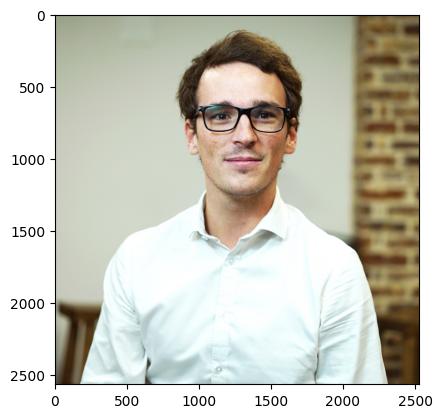

In [2]:
import skimage as ski
import matplotlib.pyplot as plt

image = ski.io.imread("romain.jpg")

plt.imshow(image)

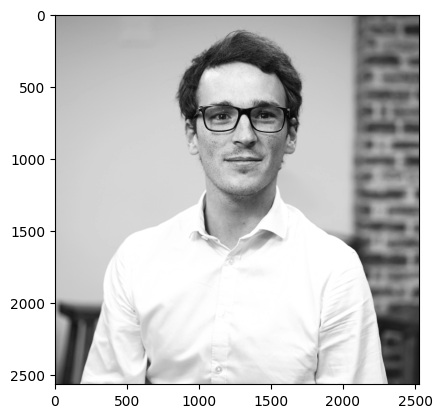

In [3]:
image = ski.color.rgb2gray(image)
plt.imshow(image, cmap="gray")

Filtre bilatéral

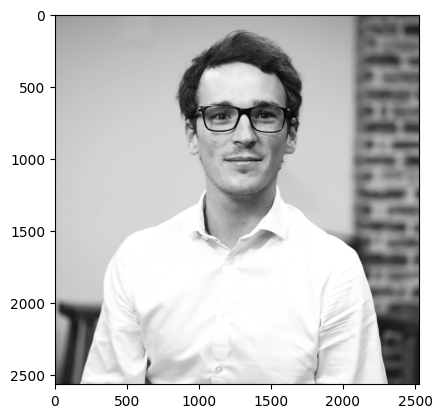

In [4]:
image = ski.restoration.denoise_bilateral(image, sigma_color=0.05, sigma_spatial=2)
plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

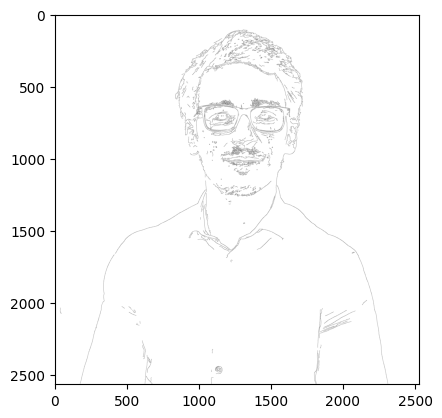

In [5]:
edge_image = ski.feature.canny(image)
plt.imshow(1 - edge_image, cmap="gray")


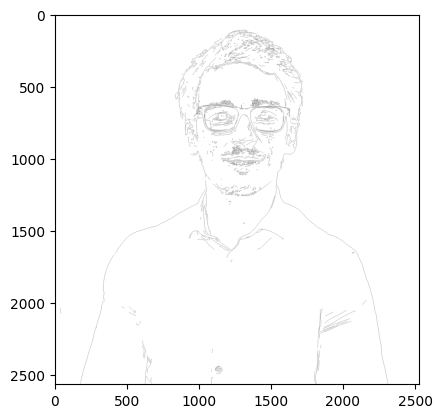

In [6]:
import numpy as np
from skimage.morphology import skeletonize
edge_image = 1 - skeletonize(edge_image)
plt.imshow(edge_image, cmap="gray")

Regrouper les bords de l'image en composantes connexes.

In [7]:
from edge_walker import group_edges

edge_groups = group_edges(edge_image)

2529
2566
(2566, 2529)
44127
133
43969
10
43930
88
43834
0
43798
20
43771
10
43758
21
43735
12
43691
30
43655
2
43651
0
43633
45
43546
17
43526
0
43525
0
43522
0
43521
28
43490
0
43489
7
43480
21
43456
2
43435
0
43422
0
43389
0
43387
0
43386
7
43377
0
43376
0
43375
0
43374
0
43373
0
43371
1
43368
19
43343
0
43342
11
43325
0
43324
0
43323
1
43317
0
43316
0
43315
14
43260
0
43197
0
43133
15
43116
0
43084
0
43083
0
43082
0
43042
0
43041
0
43040
0
43038
55
42981
0
42980
0
42979
12
42962
0
42961
0
42937
0
42883
0
42880
9
42869
0
42845
0
42844
58
42784
0
42771
0
42747
0
42724
0
42708
0
42689
0
42666
0
42664
0
42656
7
42609
0
42608
7
42593
18
42550
0
42549
14
42532
0
42531
0
42490
0
42448
0
42421
0
42404
0
42392
0
42390
17
42360
0
42358
1
42353
0
42344
5
42337
0
42332
0
42331
53
42270
0
42269
5
42254
0
42252
0
42251
0
42232
0
42220
0
42219
0
42212
0
42189
0
42186
4
42176
46
42075
14
42049
0
42045
35
41994
50
41939
5
41928
6
41919
0
41918
0
41917
0
41909
0
41908
12
41885
1
41858
0
41846
0
4184

In [8]:
print(len(edge_groups))

2182


<Axes: ylabel='Count'>

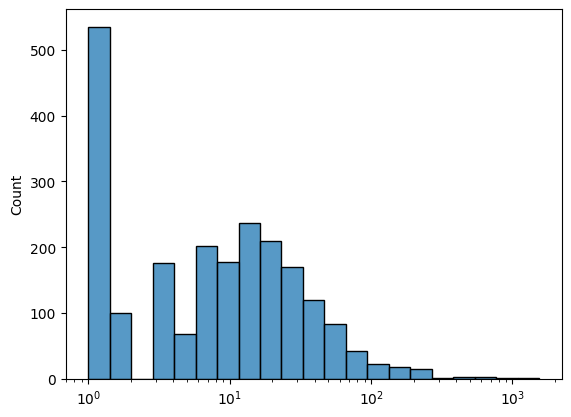

In [9]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)

Filter and scale edges.

In [10]:
min_edge_length = 9
step = 2

max_length=max(image.shape[0], image.shape[1])

filtered_edge_groups = []

for point_group in edge_groups:
    if len(point_group) >= min_edge_length:
        filtered_edge_groups.append(point_group[::step].copy()/max_length)

len(filtered_edge_groups)

1101

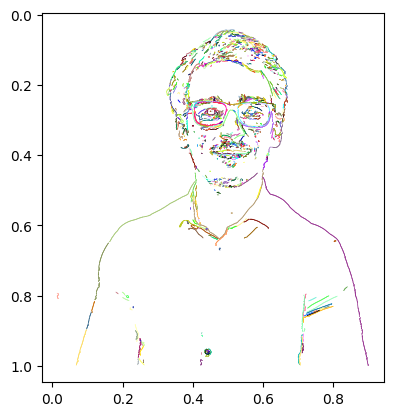

In [12]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, filtered_edge_groups):
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

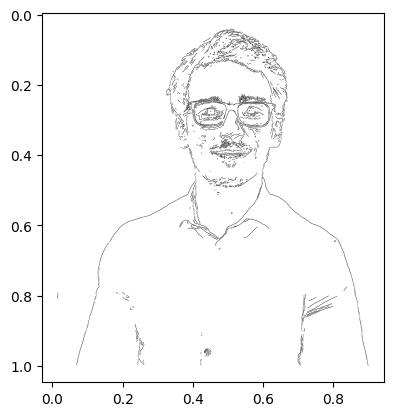

In [13]:
plt.gca().invert_yaxis()
for c, point_group in zip(cs, filtered_edge_groups):
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.2)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")